In [ ]:
# default_exp opt

In [1]:
#export
import GPyOpt
import GPy
import numpy as np
from autoforest.reg import *

In [2]:
%reload_ext autoreload
%autoreload 2

In [39]:
#export
class RfOptimizer:
    domain       =[{'name': 'min_sample_leaf',      'type': 'continuous', 'domain': (2., 10.)},
               {'name': 'n_estimators','type': 'continuous', 'domain': (10.,100.)},
               {'name': 'max_features','type' : 'continuous', 'domain': (0.1, 1.0)}]
    def x_to_dict(self, x):
        return { d['name']:var for d, var in zip(self.domain,x)}
    
    def __init__(self, rf_regressor, 
                 key='val_rmse', 
                max_iter=50):
        
        self.rfmodel = rf_regressor
        self.max_iter = max_iter
        self.opt=None
        self.key = key
        self.logg = []

    def _fit_rf(self, x):
        fs = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):   # usually we only get one row of parameters for each call
            fs[i] = 0
            print(" ")
            
            self.rfmodel.create_model(**self.x_to_dict(x[i]))
            result = self.rfmodel.fit()
            self.logg.append((self.x_to_dict(x[i]), result))
            print(result)
            
        return result[self.key]
    
    
    def run_optimizer(self,acquisition_weight=0.2):
        self.opt = GPyOpt.methods.BayesianOptimization(f = self._fit_rf,            # function to optimize       
                                          domain = self.domain,         # box-constraints of the problem
                                          acquisition_type ='LCB',       # LCB acquisition
                                          acquisition_weight = acquisition_weight)   # Exploration exploitation
        self.opt.run_optimization(max_iter=self.max_iter)
    def plot_convergence(self):
        if self.opt is not None:
            self.opt.plot_convergence()
            

In [35]:
filename = "Buldozers.csv"           # dataframe containing all the data
y_col_name = 'SalePrice'         # name of the column we are going to predict
split_pct = 0.2             # size of verification dataset
datefield = 'saledate'     # name of the field containing the date-part
ctd = ['saleDayofyear',
 'state',
 'saleDay',
 'Track_Type',
 'Stick_Length',
 'fiModelDescriptor',
 'Pad_Type',
 'saleWeek',
 'Transmission',
 'Blade_Width',
 'Scarifier',
 'Blade_Type',
 'auctioneerID',
 'Enclosure_Type',
 'saleDayofweek',
 'fiModelSeries',
 'Engine_Horsepower',
 'UsageBand',
 'saleMonth',
 'Ripper',
 'Coupler',
 'Turbocharged',
 'Undercarriage_Pad_Width',
 'Travel_Controls',
 'Thumb',
 'Backhoe_Mounting',
 'Tip_Control',
 'Pushblock',
 'Differential_Type',
 'Pattern_Changer',
 'saleElapsed']

In [36]:
import pandas as pd
from autoforest.cleaner import *
from fastai.tabular.all import *


In [40]:
df = pd.read_csv(filename, low_memory=False)
df = fix_dataframe(df, datefield= datefield, y_col_name = y_col_name)
splits = split_by_date(df, pct=0.2)
reg = RfRegressor.from_dataframe(df, y_col_name, splits)
reg.ctd = ctd

In [41]:
opt = RfOptimizer(reg, max_iter=50)
opt.run_optimizer()

 
training
finished
training time: 5.815709829330444
{'train_rmse': 0.1628589480342141, 'val_rmse': 0.21887385848258548, 'oob_error': 0.21079482901434007, 'oob_score': 0.9042379786481605}
 
training
finished
training time: 4.404778480529785
{'train_rmse': 0.17984231341688994, 'val_rmse': 0.22193793935538797, 'oob_error': 0.2145654749960077, 'oob_score': 0.9007814026056762}
 
training
finished
training time: 4.814200401306152
{'train_rmse': 0.20289037198934082, 'val_rmse': 0.2381340079806285, 'oob_error': 0.2273042510023869, 'oob_score': 0.8886504376719816}
 
training
finished
training time: 5.848071813583374
{'train_rmse': 0.1551967623269294, 'val_rmse': 0.21892135847427924, 'oob_error': 0.21117405519801563, 'oob_score': 0.9038931112491704}
 
training
finished
training time: 17.715110540390015
{'train_rmse': 0.14288982359760422, 'val_rmse': 0.2188597564963802, 'oob_error': 0.21041639597952938, 'oob_score': 0.9045815068336082}
 
training
finished
training time: 13.937564134597778
{'trai

 
training
finished
training time: 13.032860040664673
{'train_rmse': 0.12835595312816103, 'val_rmse': 0.2184183477047807, 'oob_error': 0.20964621185730678, 'oob_score': 0.9052787463354524}
 
training
finished
training time: 8.870823860168457
{'train_rmse': 0.1477181189979459, 'val_rmse': 0.21807616528297993, 'oob_error': 0.20862501654270882, 'oob_score': 0.9061992811197968}
 
training
finished
training time: 9.868944883346558
{'train_rmse': 0.14511165641063395, 'val_rmse': 0.21751105166712675, 'oob_error': 0.20843683829440735, 'oob_score': 0.9063684199374609}
 
training
finished
training time: 5.730807542800903
{'train_rmse': 0.16007367068292322, 'val_rmse': 0.2219238062281351, 'oob_error': 0.21168925821717482, 'oob_score': 0.9034235937250462}
 
training
finished
training time: 8.42414665222168
{'train_rmse': 0.1614780521338116, 'val_rmse': 0.22038422805871122, 'oob_error': 0.21278140687039, 'oob_score': 0.9024245078134967}
 
training
finished
training time: 17.301068544387817
{'train_

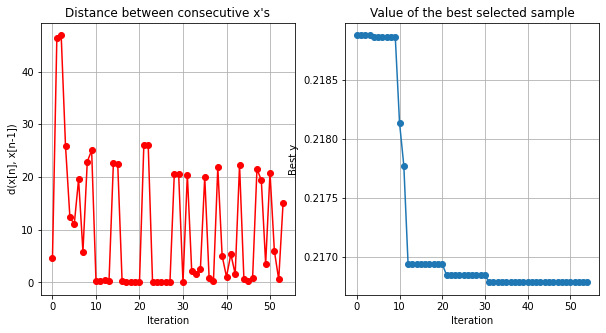

In [42]:
opt.plot_convergence()